In [1]:
import pandas as pd

# load csv file into data frame
df= pd.read_csv("AusApparalSales4thQrt2020.csv")

# display basic information and frist few rows

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [4]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,01-Oct-20,Morning,WA,Kids,8,20000
1,01-Oct-20,Morning,WA,Men,8,20000
2,01-Oct-20,Morning,WA,Women,4,10000
3,01-Oct-20,Morning,WA,Seniors,15,37500
4,01-Oct-20,Afternoon,WA,Kids,3,7500


In [ ]:
# The dataset contains 7,560 sales records with the following columns:

Date: The transaction date.
Time: The time of the transaction (e.g., Morning, Afternoon, Evening).
State: The Australian state where the sale occurred.
Group: Customer group (Kids, Men, Women, Seniors).
Unit: Number of units sold.
Sales: Total revenue from the sale.

In [ ]:
# Now, I'll analyze the total sales by state to identify the highest-revenue states and suggest strategies for lower-performing states

In [13]:
# Aggregate total sales by state
state_sales = df.groupby("State")["Sales"].sum().reset_index()

# Sort by sales in descending order
state_sales = state_sales.sort_values(by="Sales", ascending=False)

# Display the top states by revenue
state_sales


,State,Sales
5,VIC,105565000
0,NSW,74970000
3,SA,58857500
2,QLD,33417500
4,TAS,22760000
1,NT,22580000
6,WA,22152500


In [ ]:
# Here are the total sales by state for the fourth quarter of 2020:

VIC (Victoria) - $105,565,000 (Highest revenue)
NSW (New South Wales) - $74,970,000
SA (South Australia) - $58,857,500
QLD (Queensland) - $33,417,500
TAS (Tasmania) - $22,760,000
NT (Northern Territory) - $22,580,000
WA (Western Australia) - $22,152,500 (Lowest revenue)

In [ ]:
# Key Insights:
Victoria (VIC) and New South Wales (NSW) are the top-performing states, contributing the highest revenue.
Western Australia (WA), Northern Territory (NT), and Tasmania (TAS) are among the lowest-performing states.

In [15]:
# Now, I'll analyze sales by customer group in these lower-revenue states to identify potential areas for improvement. ​

# Filter data for lower-performing states (WA, NT, TAS)
low_revenue_states = ["WA", "NT", "TAS"]
low_state_sales = df[df["State"].isin(low_revenue_states)]

# Aggregate sales by state and customer group
low_state_group_sales = low_state_sales.groupby(["State", "Group"])["Sales"].sum().reset_index()

# Sort for better readability
low_state_group_sales = low_state_group_sales.sort_values(by=["State", "Sales"], ascending=[True, False])

# Display the results
low_state_group_sales




,State,Group,Sales


In [16]:
# It looks like there might be an issue with filtering the lower-revenue states. Let me verify the state names in the dataset to ensure accuracy before proceeding with further analysis.

In [17]:
# Check unique state names to ensure correct filtering
df["State"].unique()


array([' WA', ' NT', ' SA', ' VIC', ' QLD', ' NSW', ' TAS'], dtype=object)

In [18]:
# The state names in the dataset contain leading spaces. I'll correct the filtering and reanalyze sales by customer group in the lower-revenue states

In [19]:
# Strip spaces from state names
df["State"] = df["State"].str.strip()

# Re-run analysis for low-revenue states
low_state_sales = df[df["State"].isin(low_revenue_states)]

# Aggregate sales by state and customer group
low_state_group_sales = low_state_sales.groupby(["State", "Group"])["Sales"].sum().reset_index()

# Sort for better readability
low_state_group_sales = low_state_group_sales.sort_values(by=["State", "Sales"], ascending=[True, False])

# Display the results
low_state_group_sales


,State,Group,Sales
1,NT,Men,5762500
0,NT,Kids,5700000
3,NT,Women,5652500
2,NT,Seniors,5465000
4,TAS,Kids,5775000
5,TAS,Men,5757500
6,TAS,Seniors,5650000
7,TAS,Women,5577500
9,WA,Men,5752500
8,WA,Kids,5625000


In [ ]:
Sales Breakdown by Customer Group in Lower-Revenue States:
Northern Territory (NT)
Men: $5,762,500 (Highest)
Kids: $5,700,000
Women: $5,652,500
Seniors: $5,465,000 (Lowest)
Tasmania (TAS)
Kids: $5,775,000 (Highest)
Men: $5,757,500
Seniors: $5,650,000
Women: $5,577,500 (Lowest)
Western Australia (WA)
Men: $5,752,500 (Highest)
Kids: $5,625,000
Seniors: $5,512,500
Women: $5,262,500 (Lowest)
Insights & Recommendations
Target Women’s Segment for Growth:

In WA, TAS, and NT, the Women’s category generates the lowest sales.
Strategy: Run promotional campaigns, introduce new product lines, and optimize inventory for this category.
Expand Kids’ Apparel Marketing in NT & WA:

Kids' sales in NT & WA are slightly lower than other groups.
Strategy: Partner with schools, offer back-to-school discounts, and create bundled offers.
Boost Senior Segment Sales in NT & WA:

Seniors' sales are the lowest in NT & WA.
Strategy: Introduce senior citizen discounts and tailor marketing efforts toward comfort-based apparel.

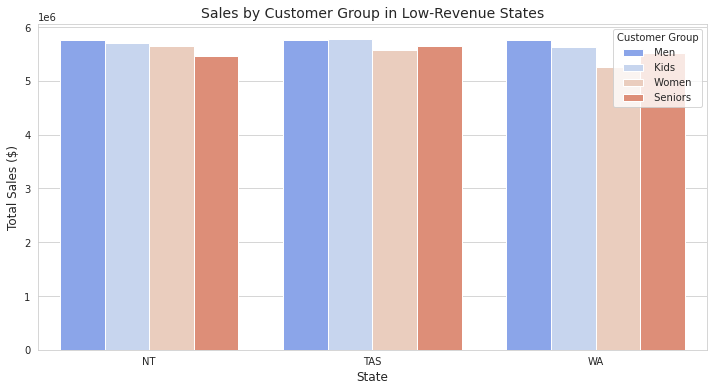

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create a bar plot for sales by customer group in lower-revenue states
plt.figure(figsize=(12, 6))
sns.barplot(data=low_state_group_sales, x="State", y="Sales", hue="Group", palette="coolwarm")

# Labels and title
plt.title("Sales by Customer Group in Low-Revenue States", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.legend(title="Customer Group")

# Show plot
plt.show()


In [ ]:
# Key Takeaways from the Visualization:
Men’s and Kids' segments generate the highest sales in NT and TAS.
Women’s segment has the lowest sales across all three states.
WA has the lowest overall sales, with Women’s and Seniors' categories lagging behind.
Strategic Recommendations:
✅ Boost Women’s Apparel Sales: Run targeted marketing campaigns, introduce loyalty discounts, and expand fashion choices.
✅ Senior Citizen Promotions: Offer special discounts, promote comfort-focused apparel, and explore partnership deals with community centers.
✅ Expand Kids’ Apparel in WA: Promote schoolwear bundles, seasonal discounts, and influencer-driven campaigns.